# Demos: Lecture 4

In [1]:
import pennylane as qml
from pennylane import numpy as np

## Exercise 1: $Y$-basis rotation

In [6]:
dev = qml.device('default.qubit', wires=1)
  
def convert_to_y_basis():
    # YOUR CODE HERE; find a circuit that sends 
    # |0> -> |p> and |1> -> |m>
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    #qml.SX(wires=0)
    
@qml.qnode(dev)
def rotate_basis():
    convert_to_y_basis()
    return qml.state()

In [7]:
rotate_basis()

tensor([0.70710678+0.j        , 0.        +0.70710678j], requires_grad=True)

Measure this in the Y basis

<img src="fig/basis-rotation-hands-on.png" width=350> 

In [8]:
@qml.qnode(dev)
def bigger_circuit(x, y, z):
    qml.RX(x, wires=0)
    qml.RY(y, wires=0)
    qml.RZ(z, wires=0)
    
    # Basis rotation
    adjoint_basis_rotation = qml.adjoint(convert_to_y_basis)
    adjoint_basis_rotation()
    
    return qml.probs()

In [9]:
bigger_circuit(0.2, 0.4, 0.6)

tensor([0.52576513, 0.47423487], requires_grad=True)

In [10]:
qml.draw(bigger_circuit)(0.2, 0.4, 0.6)

'0: ──RX(0.20)──RY(0.40)──RZ(0.60)──S†──H†─┤  Probs'

(<Figure size 576x144 with 1 Axes>, <Axes:>)

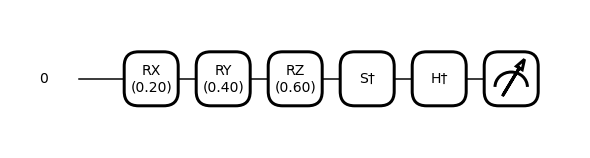

In [12]:
qml.draw_mpl(bigger_circuit, decimals=2)(0.2, 0.4, 0.6)